In this project, we will see how we can add a watermark o an image. Adding a watermark works as a copywrite for your image, so that no one can illegally use your image or document. We will use OpenCV for this project to add logl and text as a watermark.

In [1]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

We will start by importing required libraries like OpenCV for image processing, numpy for mathematical computation, etc.

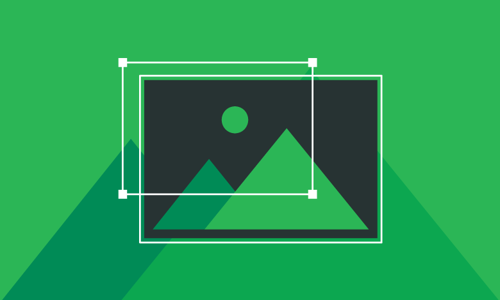

In [3]:
# Reading image from url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png',stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

For this project we need an image URL on which we will apply watermark. We will load the image using the URL of the image from google images. You can use any image taht you desire and replace the URL of the image with the current URL. Next we will read and resize the image and finally and store it into two variables for logo and text watermarking.